**Using this dataset, Find the insights of Cars**

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
car=pd.read_csv("Car_Price_Prediction.csv")

In [13]:
df=car.copy()

In [17]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [23]:
df.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


In [25]:
df.shape

(1000, 8)

In [29]:
df.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

**1.Which brands (Make) are most common in the dataset?**

In [70]:
Most_Common_Brand=df['Make'].value_counts()
print("These are the brands with their counts:")
print(Most_Common_Brand)

These are the brands with their counts:
Make
Ford      225
Audi      212
Honda     198
Toyota    187
BMW       178
Name: count, dtype: int64


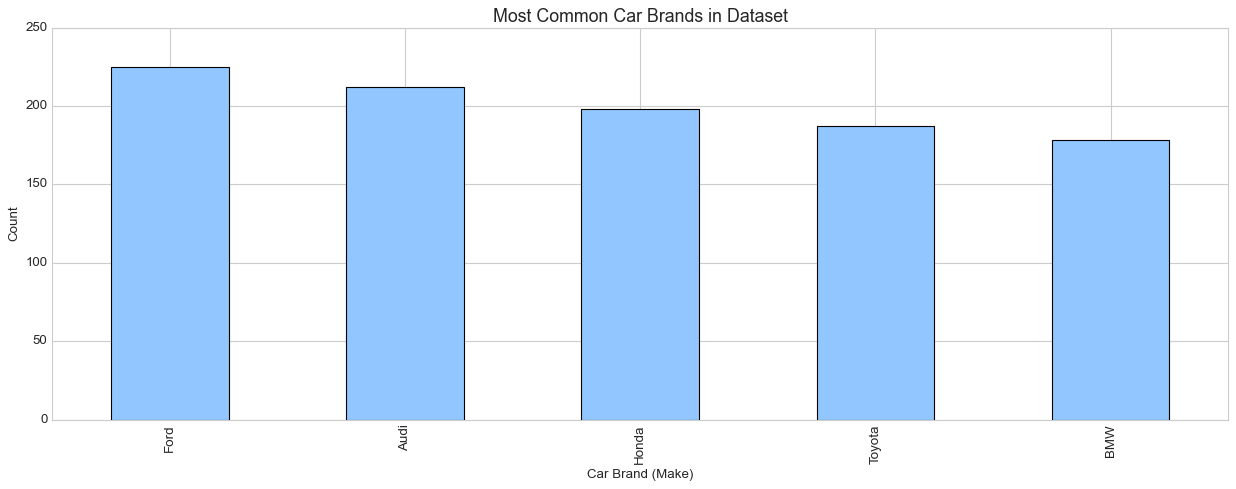

In [505]:
plt.style.use('seaborn-v0_8-pastel')
plt.figure(figsize=(15,5))
Most_Common_Brand.plot(kind="bar")
plt.title("Most Common Car Brands in Dataset")
plt.xlabel("Car Brand (Make)")
plt.ylabel("Count")
plt.savefig("commonbrand.png")
plt.show()

**2.What is the distribution of car prices? (Are most cars cheap, mid-range, or luxury?)**

In [95]:
dist=df["Price"].describe()
print("Distribution of car prices")
dist

Distribution of car prices


count     1000.000000
mean     25136.615530
std       5181.401368
min       6704.953524
25%      21587.878370
50%      25189.325247
75%      28806.368974
max      41780.504635
Name: Price, dtype: float64

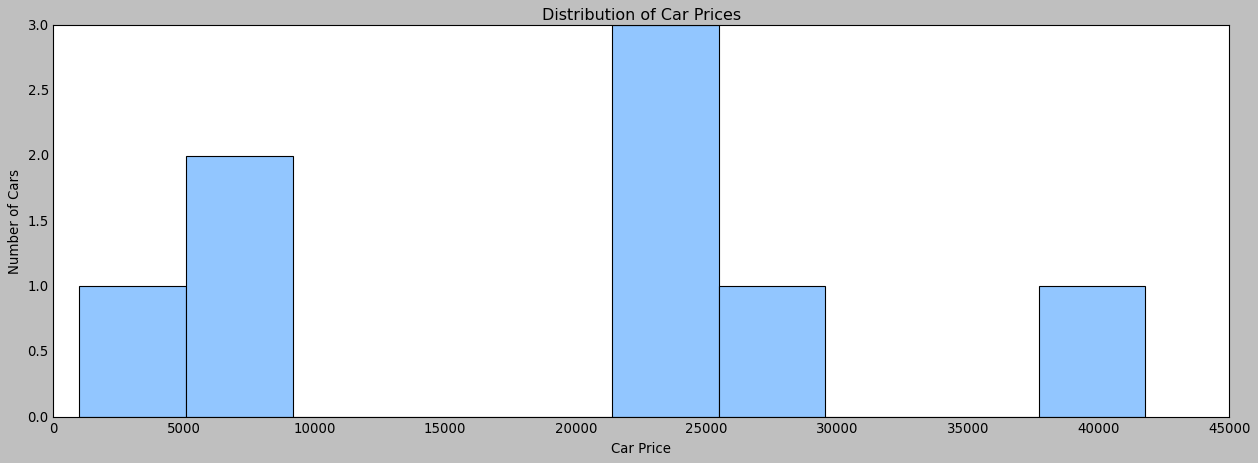

<Figure size 160x160 with 0 Axes>

In [533]:
# print(plt.style.available)
plt.style.use('seaborn-v0_8-pastel')
plt.figure(figsize=(15,5))
dist.plot(kind="hist")
plt.title("Distribution of Car Prices")
plt.xlabel("Car Price")
plt.ylabel("Number of Cars")
plt.show()
plt.savefig("21.png")

**3.How does the year of manufacture relate to price? (Do newer cars always cost more?)**

In [113]:
year_of_manufacture_mean=df.groupby("Year")["Price"].mean()
print("As you can see the year of manufacture relate to price")
year_of_manufacture_mean

As you can see the year of manufacture relate to price


Year
2000    18856.764839
2001    21035.737042
2002    20975.258486
2003    21495.710457
2004    22448.291774
2005    22816.029328
2006    23358.831138
2007    22456.775651
2008    24147.436150
2009    24089.214647
2010    23397.652080
2011    25355.522771
2012    25570.840552
2013    26314.905724
2014    26599.788507
2015    27797.039929
2016    28554.207240
2017    27134.562275
2018    28429.558024
2019    29585.602566
2020    30228.689053
2021    30516.997057
Name: Price, dtype: float64

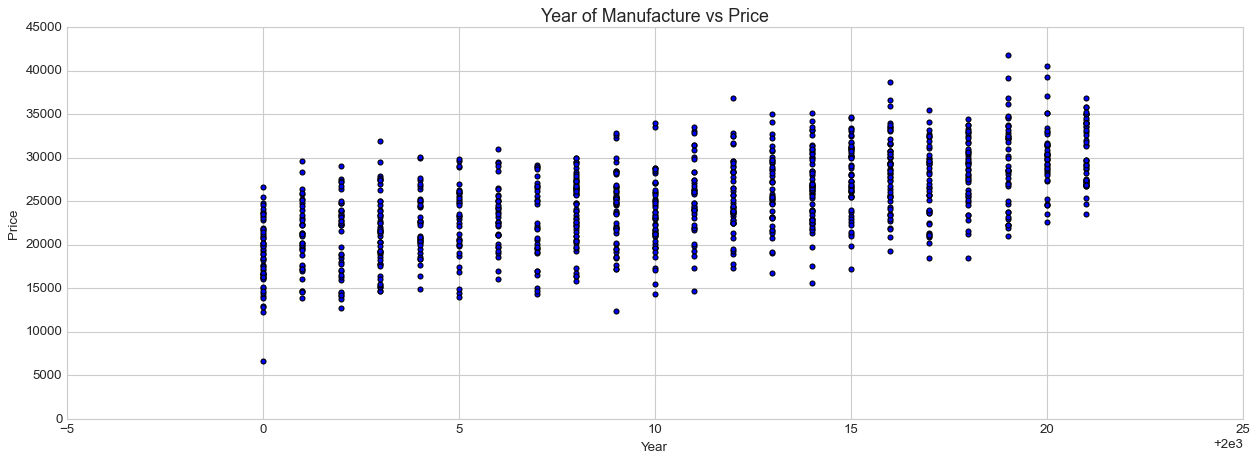

In [509]:
plt.style.use('seaborn-v0_8-muted')
plt.figure(figsize=(15,5)) 
plt.scatter(df["Year"],df["Price"])
plt.title("Year of Manufacture vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.savefig("3.png")
plt.show()

**4.Does engine size affect price? (Do bigger engines cost more?)**

In [168]:
df.head(2)

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684


In [176]:
print("As we can see engine size affect price or not")
df.groupby("Engine Size")["Price"].sum().sort_index(ascending=False)


As we can see engine size affect price or not


Engine Size
4.5    507606.772455
4.4    818813.496192
4.3    866158.064784
4.2    647248.224888
4.1    973014.269597
4.0    889273.628722
3.9    893386.425842
3.8    940910.202370
3.7    778823.758095
3.6    797574.275679
3.5    913467.364691
3.4    990879.111534
3.3    598175.235903
3.2    660171.234263
3.1    663640.303102
3.0    913993.294761
2.9    380994.165911
2.8    566094.103039
2.7    798154.376897
2.6    596364.152472
2.5    696460.873806
2.4    720113.069486
2.3    541003.850415
2.2    720380.335790
2.1    775993.572402
2.0    809831.362153
1.9    559334.202480
1.8    574605.338932
1.7    532778.412624
1.6    585115.770033
1.5    559146.724414
1.4    791717.200583
1.3    443001.284998
1.2    619472.857839
1.1    727229.555974
1.0    285688.657325
Name: Price, dtype: float64

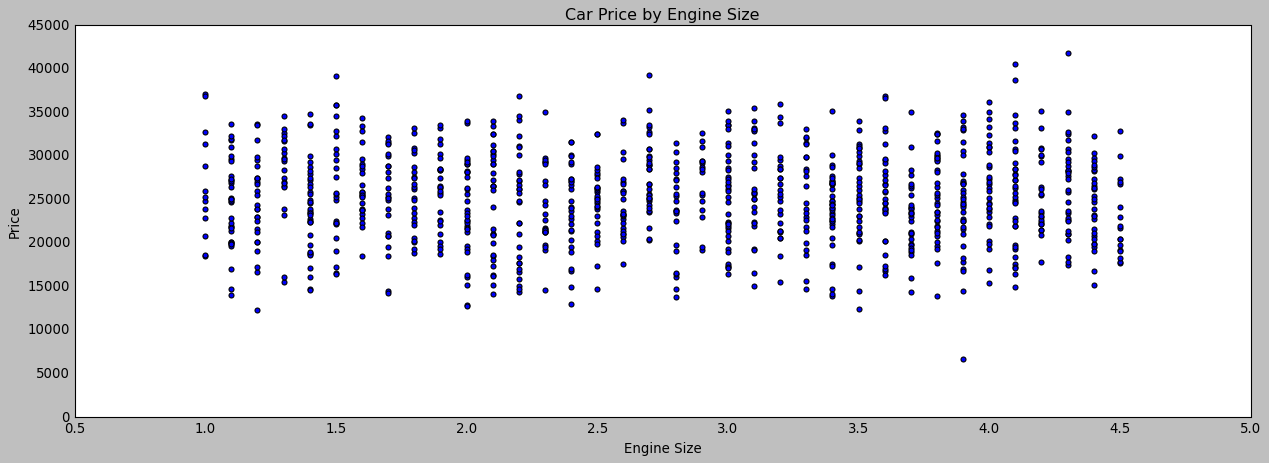

In [547]:
# print(plt.style.available)
plt.style.use('seaborn-v0_8-muted')
plt.figure(figsize=(15,5)) 
plt.scatter(df["Engine Size"].sort_index(ascending=False),df["Price"])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Car Price by Engine Size")
plt.show()

**5.How does mileage affect price? (Do high-mileage cars sell for less?)**

In [211]:
df.head(2)

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684


In [219]:
df["Mileage"].corr(df["Price"])

-0.5565598034531233

In [227]:
# split into 5 groups just like these:
# (0, 15000]      → lowest 20% mileage cars  
# (15000, 30000]  → next 20%  
# (30000, 60000]  → middle 20%  
# (60000, 100000] → next 20%  
# (100000, 200000]→ highest 20% mileage cars

df['Mileage_bin'] = pd.qcut(df['Mileage'], 5) 
avg_price = df.groupby("Mileage_bin")["Price"].mean()
print(avg_price)

Mileage_bin
(55.999, 33740.2]       28867.047527
(33740.2, 73054.0]      27616.965222
(73054.0, 114875.2]     24966.263746
(114875.2, 161938.4]    23160.404421
(161938.4, 199867.0]    21072.396737
Name: Price, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_10832\3050572935.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby("Mileage_bin")["Price"].mean()


In [233]:
df.groupby('Mileage_bin')["Price"].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_10832\1547753674.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Mileage_bin')["Price"].mean()


Mileage_bin
(55.999, 33740.2]       28867.047527
(33740.2, 73054.0]      27616.965222
(73054.0, 114875.2]     24966.263746
(114875.2, 161938.4]    23160.404421
(161938.4, 199867.0]    21072.396737
Name: Price, dtype: float64

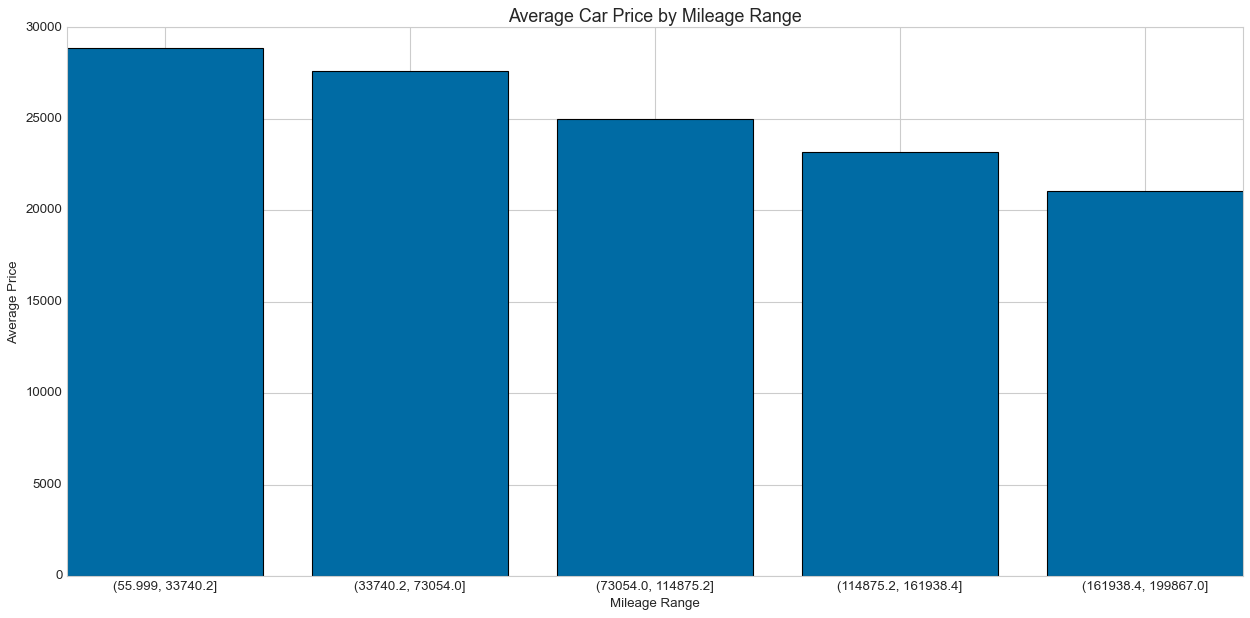

<Figure size 160x160 with 0 Axes>

In [515]:
plt.style.use("tableau-colorblind10")
# print(plt.style.available)
plt.figure(figsize=(15,7))
plt.bar(avg_price.index.astype(str), avg_price.values)
plt.xlabel("Mileage Range")
plt.ylabel("Average Price")
plt.title("Average Car Price by Mileage Range")
plt.show()
plt.savefig("5.png")

**6.Do automatic cars tend to be more expensive than manuals?**

In [256]:
df.head(1)

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price,Mileage_bin
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931,"(73054.0, 114875.2]"


In [260]:
df["Transmission"].value_counts()

Transmission
Manual       511
Automatic    489
Name: count, dtype: int64

**Based on the dataset, more cars with Manual transmission were sold compared to Automatic transmission**

In [271]:
print("Yes, compared to Manual cars, Automatic cars tend to be more expensive")
transmission=df.groupby("Transmission")["Price"].mean()
print(transmission)

Yes, compared to Manual cars, Automatic cars tend to be more expensive
Transmission
Automatic    25272.048139
Manual       25007.013680
Name: Price, dtype: float64


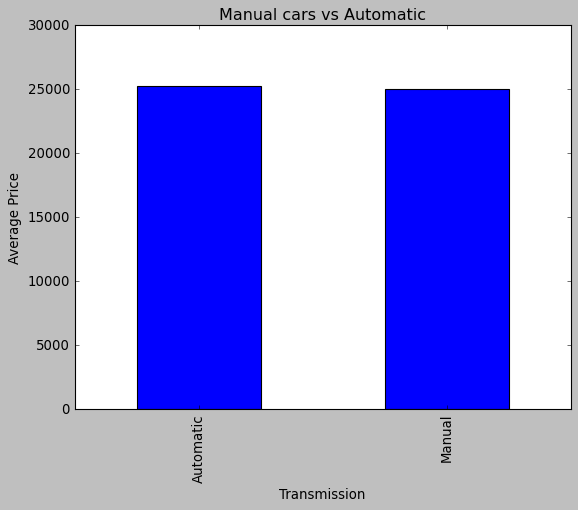

In [517]:
plt.style.use("classic")
transmission.plot(kind="bar")
plt.ylabel("Average Price")
plt.title("Manual cars vs Automatic")
plt.savefig("6.png")

**7.How does fuel type (Petrol, Diesel, Hybrid, Electric) affect price?**

In [280]:
df.head(1)

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price,Mileage_bin
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931,"(73054.0, 114875.2]"


In [282]:
df["Fuel Type"].value_counts()

Fuel Type
Diesel      344
Petrol      331
Electric    325
Name: count, dtype: int64

In [288]:
Fuel=df.groupby("Fuel Type")["Price"].mean()
print(Fuel)

Fuel Type
Diesel      25134.578414
Electric    25218.993791
Petrol      25057.847655
Name: Price, dtype: float64


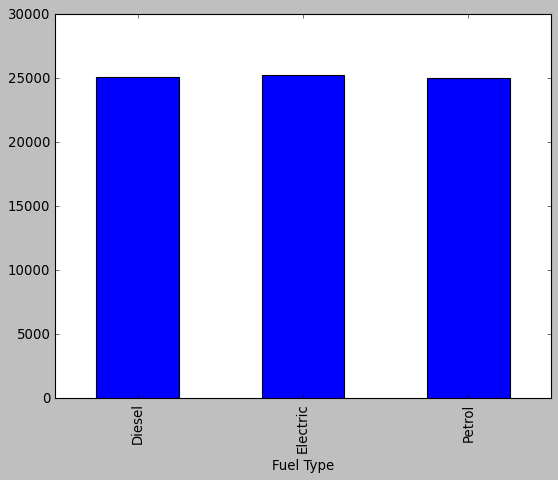

In [519]:
# print(plt.style.available)
plt.style.use("classic")
Fuel.plot(kind="bar")
plt.savefig("7.png")

**8.Can we create a new feature like car age = current year – Year? How does car age affect price?**


In [367]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price,Mileage_bin
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931,"(73054.0, 114875.2]"
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684,"(73054.0, 114875.2]"
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347,"(73054.0, 114875.2]"
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491,"(73054.0, 114875.2]"
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657,"(114875.2, 161938.4]"


In [371]:
current_year=2025
df["car age"]=current_year-df["Year"]

In [373]:
df["car age"].head(5)

0    10
1    11
2    19
3    10
4    21
Name: car age, dtype: int64

In [381]:
car_age=df.groupby("car age")["Price"].mean()
print(car_age)

car age
4     30516.997057
5     30228.689053
6     29585.602566
7     28429.558024
8     27134.562275
9     28554.207240
10    27797.039929
11    26599.788507
12    26314.905724
13    25570.840552
14    25355.522771
15    23397.652080
16    24089.214647
17    24147.436150
18    22456.775651
19    23358.831138
20    22816.029328
21    22448.291774
22    21495.710457
23    20975.258486
24    21035.737042
25    18856.764839
Name: Price, dtype: float64


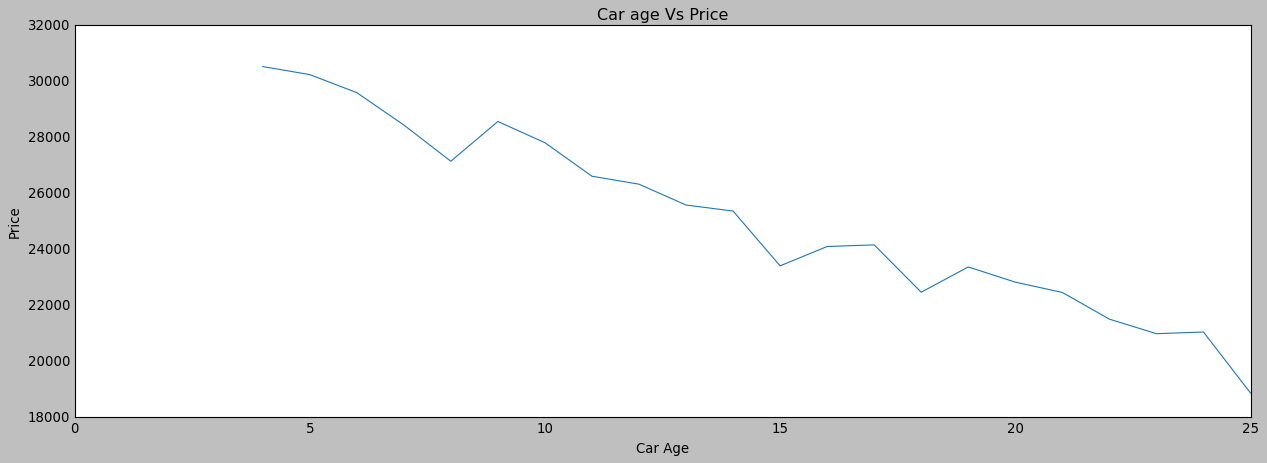

In [521]:
# print(plt.style.available)
plt.style.use('_mpl-gallery-nogrid')
plt.figure(figsize=(15,5))
car_age.plot(kind="line")
plt.xlabel("Car Age")
plt.ylabel("Price")
plt.title("Car age Vs Price")
plt.savefig("8.png")


**9.Which factor has the strongest impact on price: mileage, age, brand, or engine size?**

In [392]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price,Mileage_bin,car age
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931,"(73054.0, 114875.2]",10
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684,"(73054.0, 114875.2]",11
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347,"(73054.0, 114875.2]",19
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491,"(73054.0, 114875.2]",10
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657,"(114875.2, 161938.4]",21


In [402]:
factor=["Mileage","car age","Engine Size"]

In [525]:
corr = df[factor + ["Price"]].corr()
corr

,Mileage,car age,Engine Size,Price
Mileage,1.000000,-0.016376,-0.014815,-0.556560
car age,-0.016376,1.000000,0.012190,-0.609631
Engine Size,-0.014815,0.012190,1.000000,0.383951
Price,-0.556560,-0.609631,0.383951,1.000000


In [523]:
corr_with_price=corr["Price"].loc[factor]
corr_with_price

Mileage       -0.556560
car age       -0.609631
Engine Size    0.383951
Name: Price, dtype: float64

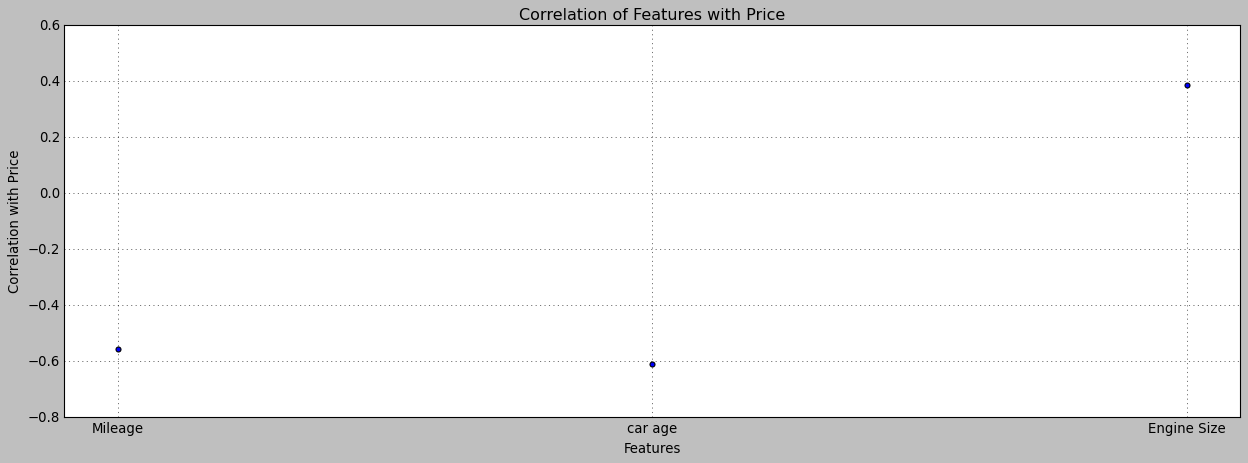

<Figure size 160x160 with 0 Axes>

In [527]:
plt.figure(figsize=(15,5))
plt.scatter(factor,corr_with_price)
plt.title("Correlation of Features with Price")
plt.xlabel("Features")
plt.ylabel("Correlation with Price")
plt.grid(True)
plt.show()
plt.savefig("9.png")

**As we generally know, a positive correlation means that as one variable increases, the other increases as well — indicating a strong or even perfect relationship between them.**

1.However, when we look at Mileage, the correlation is negative, close to [-1], which means that as mileage increases, the price tends to decrease. This isn’t an issue, but rather a common and expected trend: higher mileage usually lowers a car's value.

2.The same goes for Car Age — its negative correlation with price suggests that older cars tend to be cheaper, which also makes sense.

3.On the other hand, Engine Size shows a positive correlation with price, meaning that larger engines are generally found in more expensive cars. If the correlation is close to [+1], it indicates a strong, possibly near-perfect, relationship.

**10.Are certain models (a, b, c, d, e) consistently more expensive than others across all brands? thers across all brands?**

In [444]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price,Mileage_bin,car age
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931,"(73054.0, 114875.2]",10
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684,"(73054.0, 114875.2]",11
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347,"(73054.0, 114875.2]",19
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491,"(73054.0, 114875.2]",10
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657,"(114875.2, 161938.4]",21


In [448]:
df["Model"].value_counts()

Model
Model B    212
Model C    205
Model A    202
Model D    197
Model E    184
Name: count, dtype: int64

In [529]:
p=df.groupby(["Model","Make"])["Price"].mean().unstack()
print(p)

Make             Audi           BMW          Ford         Honda        Toyota
Model                                                                        
Model A  24703.887847  25212.008201  24641.528540  24901.568840  24233.395096
Model B  24722.374388  25341.404331  25166.460638  25639.121473  24976.812320
Model C  24220.512137  25392.171169  25831.271983  24760.744226  26297.955219
Model D  24512.053134  25652.704729  24782.339932  27136.451203  24561.393795
Model E  25193.792527  23579.669402  25986.202345  26502.461432  24557.204891


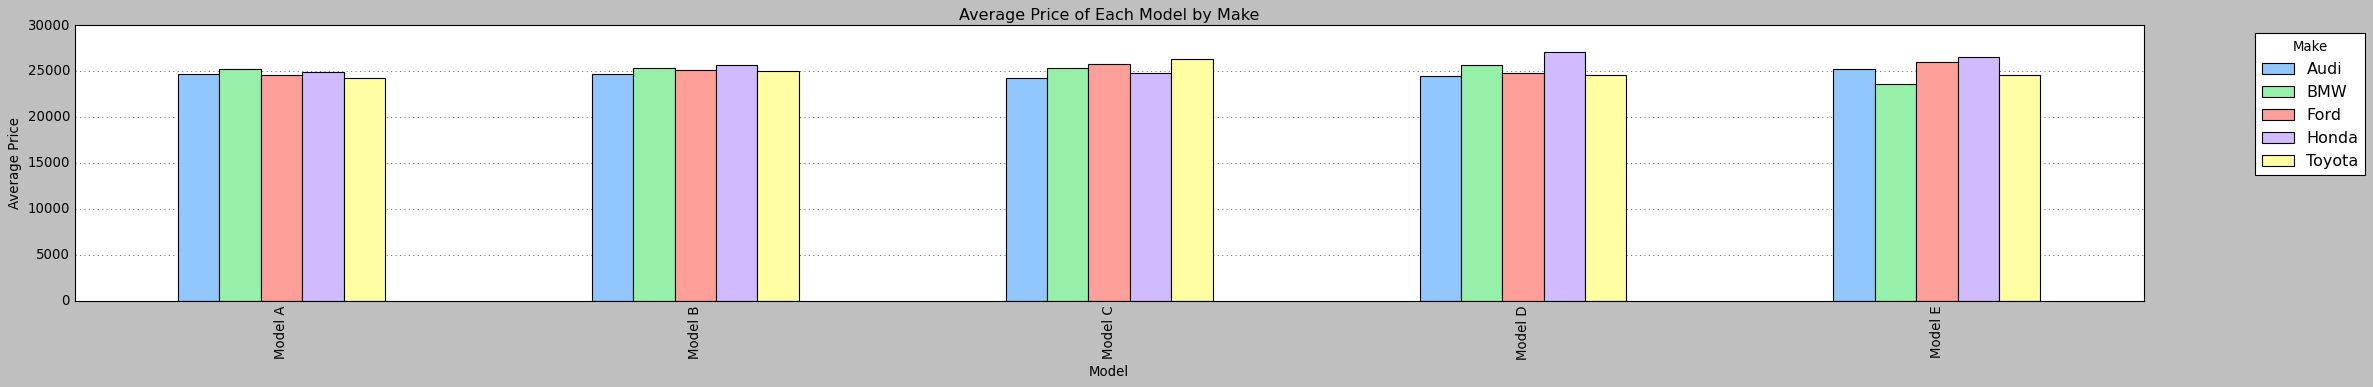

In [543]:
# print(plt.style.available)
plt.style.use("seaborn-v0_8-pastel")
fig, ax = plt.subplots(figsize=(30,5)) 
p.plot(kind='bar',ax=ax)
plt.title("Average Price of Each Model by Make")
plt.ylabel("Average Price")
plt.xlabel("Model")
plt.legend(title="Make", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()